
Number of columns available: 21

Column names: ['state', 'account_length', 'area_code', 'phone_number', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls', 'class']



C:\Users\rohit\Miniconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\rohit\Miniconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


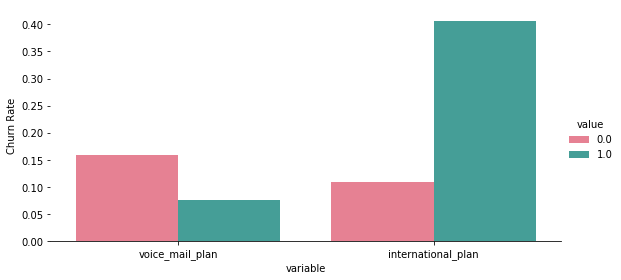

C:\Users\rohit\Miniconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\rohit\Miniconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


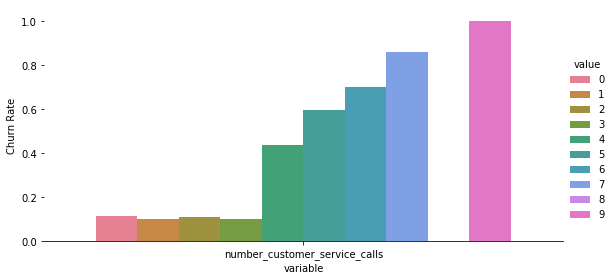

Total number of Customer Churn are:  546 and no. of Customer stayed are:  3454 as per given information
Boolean columns :  3
continuous columns :  18


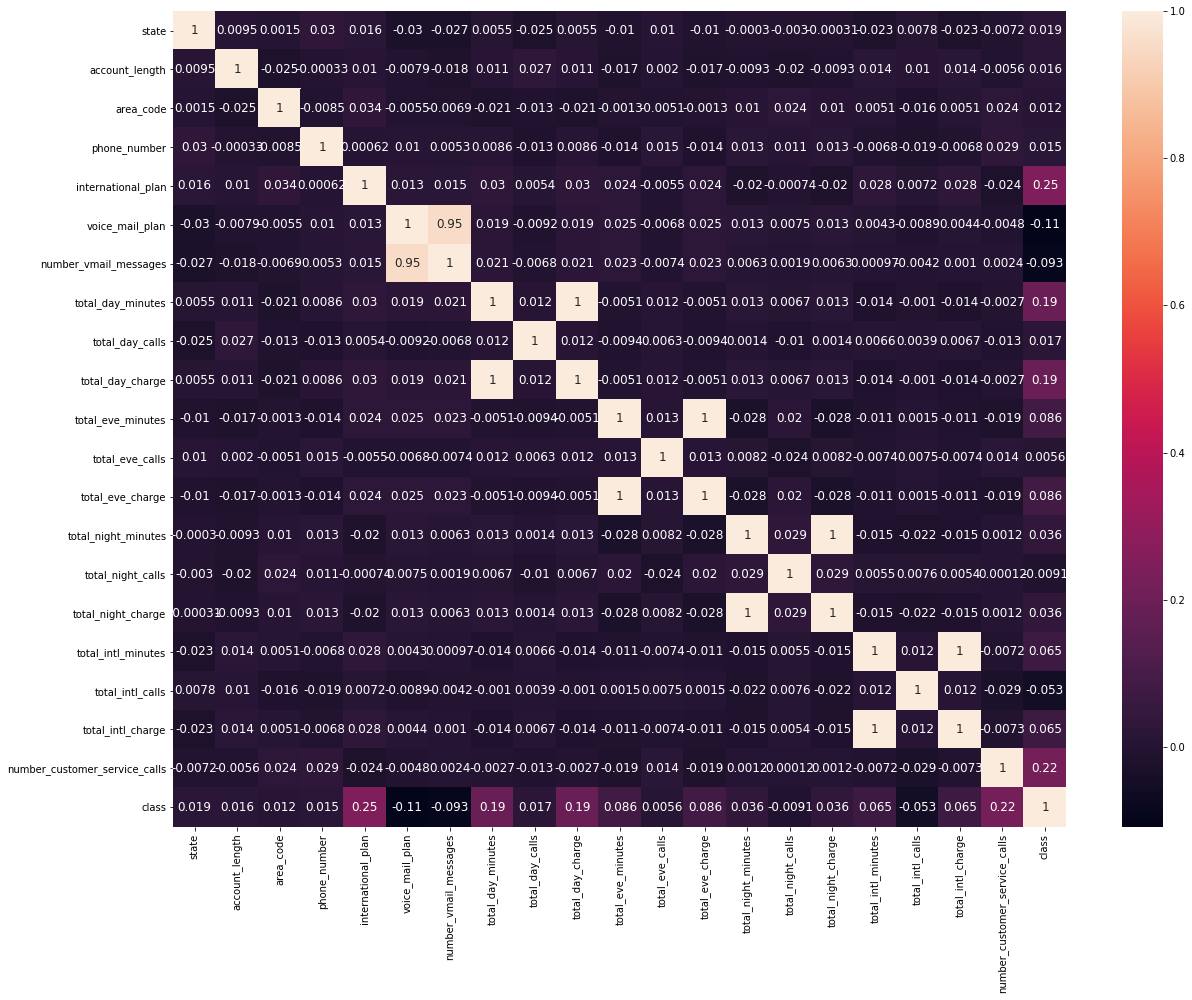

The dataframe has 21 columns.

X and y sizes, respectively: 4000 4000
(5182, 12)
(5182,)
[[0.000e+00 2.591e+03]
 [1.000e+00 2.591e+03]]
AUC-ROC Score for LogisticRegression: 0.7581260413935431
AUC-ROC Score for DecisionTreeClassifier: 0.8625275942857628


C:\Users\rohit\Miniconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\rohit\Miniconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\rohit\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC-ROC Score RandomForestRegressor: 0.841500959985114


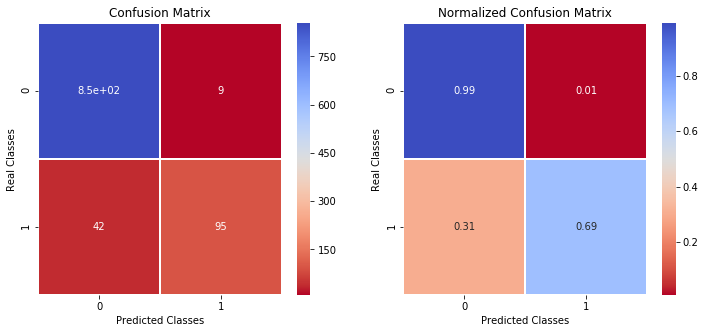

---Classification Report---
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       863
         1.0       0.91      0.69      0.79       137

   micro avg       0.95      0.95      0.95      1000
   macro avg       0.93      0.84      0.88      1000
weighted avg       0.95      0.95      0.95      1000



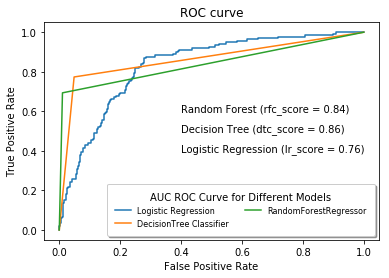

In [101]:
#Importing important library required
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from IPython.display import Image
import matplotlib as mlp
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor

#Reading data from  churn-train.csv file into df
df=pd.read_csv('churn-train.csv')

#Number of Columns and Column Name
colNames = df.columns.tolist()
print('\nNumber of columns available: {}'.format(len(colNames)))
print('\nColumn names: {}\n'.format(colNames))



#Plotting Churn rate with respect to voic mail plan and international plan
df1 = pd.melt(df, id_vars=['class'], value_vars=["voice_mail_plan","international_plan"], var_name='variable' )
# Create a factorplot
g = sns.factorplot( x="variable", y="class", hue='value', data=df1, size=4, aspect=2, kind="bar", palette="husl", ci=None )
g.despine(left=True)
g.set_ylabels("Churn Rate")
plt.show() #important insights gathered from these

#Plotting Churn rate with respect to number_customer_service calls
df1 = pd.melt(df, id_vars=['class'], value_vars=["number_customer_service_calls"], var_name='variable' )
# Create a factorplot
g = sns.factorplot( x="variable", y="class", hue='value', data=df1, size=4, aspect=2, kind="bar", palette="husl", ci=None )
g.despine(left=True)
g.set_ylabels("Churn Rate")
plt.show()

#Calculating no. of customer churn and stayed
class_ = df.loc[df['class'] == 1]
non_class_ = df.loc[df['class'] == 0]
print("Total number of Customer Churn are: ", len(class_), "and no. of Customer stayed are: ", len(non_class_), "as per given information")
#Total number of Customer Churn are:  546 and no. of Customer stayed are:  3454 as per given information
#Conclusion 1 = Imbalanced data - Lesser datapoints in True Churn category

#Identifying binary Columns
binary_columns = [col for col in df.columns if len(df[col].unique())==2 or df[col].dtype=='O']

#Identifying CContinuous Columns
continuous_columns = [col for col in df.columns if len(df[col].unique())>2 and (df[col].dtype=='int64' or df[col].dtype=='float64')]

print("Boolean columns : ", len(categorical_columns))
print("continuous columns : ", len(continuous_columns))


# Correlations between customer data features and customer churn
# To decide which features of the data to include in our predictive churn model, 
# we’ll examine the correlation between churn and each customer feature.
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()




#Data Preparation and Feature Engineering
#Dropping irrelevant data and columns which shows high correlation
newdf=df.drop(['state', 'area_code', 'phone_number'], axis=1)
newdf = newdf.drop('total_intl_minutes', 1)
newdf = newdf.drop('total_night_minutes', 1)
newdf = newdf.drop('total_eve_minutes', 1)
newdf = newdf.drop('total_day_minutes', 1)
newdf = newdf.drop('voice_mail_plan', 1)

# get missing values in datagrame
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        
        # Print some summary information
        print ("The dataframe has " + str(df.shape[1]) + " columns.\n")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

# Missing values statistics
missing_values = missing_values_table(df)
missing_values.head()

#Splitting the dataset
#First our model needs to be trained, second our model needs to be tested. 
#Therefore it is best to have two different dataset.
#As for now we only have one, it is very common to split the data accordingly.
#X is the data with the independent variables, Y is the data with the dependent variable. 
#The test size variable determines in which ratio the data will be split. 

X = newdf.iloc[:,:-1]
y = newdf['class']
print("X and y sizes, respectively:", len(X), len(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)


def plot_confusion_matrix(y_test, pred):
    
    y_test_false = y_test.value_counts()[0]
    y_test_true = y_test.value_counts()[1]
    
    cfn_matrix = confusion_matrix(y_test, pred)
    cfn_norm_matrix = np.array([[1.0 / y_test_false,1.0/y_test_false],[1.0/y_test_true,1.0/y_test_true]])
    norm_cfn_matrix = cfn_matrix * cfn_norm_matrix

    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(1,2,1)
    sns.heatmap(cfn_matrix,cmap='coolwarm_r',linewidths=0.5,annot=True,ax=ax)
    plt.title('Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')

    ax = fig.add_subplot(1,2,2)
    sns.heatmap(norm_cfn_matrix,cmap='coolwarm_r',linewidths=0.5,annot=True,ax=ax)

    plt.title('Normalized Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')
    plt.show()
    
    print('---Classification Report---')
    print(classification_report(y_test,pred))
    

#Algorithm 1 - Logistic Regression with SMOTE over-sampling
    
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X_train, y_train)
print(X_res.shape)
print(y_res.shape)
unique, counts = np.unique(y_res, return_counts=True)
print(np.asarray((unique, counts)).T)

LogReg = LogisticRegression(random_state=0)
LogReg.fit(X_res, y_res)
y_pred = LogReg.predict(X_test)

#Plotting ROC_AUC Curve
from sklearn.metrics import roc_curve,roc_auc_score
print("AUC-ROC Score for LogisticRegression:",roc_auc_score(y_test, y_pred))
predictions = LogReg.predict_proba(X_test)
y_pred = LogReg.predict(X_test) 
fpr1, tpr1, _ = roc_curve(y_test, predictions[:,1])
lr_score = roc_auc_score(y_test, y_pred)

#Algorithm 2 - Decision Tree
# from sklearn.tree import DecisionTreeClassifier
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict_proba(X_test)
y_pred = model.predict(X_test) 
print("AUC-ROC Score for DecisionTreeClassifier:",roc_auc_score(y_test, predictions[:,1]))
fpr2, tpr2, _ = roc_curve(y_test, predictions[:,1])
dtc_score = roc_auc_score(y_test, predictions[:,1])



#Algorithm 3 RandomForestRegressor
# Instantiate model with 10 decision trees
rf = RandomForestClassifier(n_estimators = 70, random_state = 0,max_depth=20)
# Train the model on training data
rf.fit(X_train, y_train);
# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)
y_pred_series=pd.Series(y_pred.round().astype(int))
print("AUC-ROC Score RandomForestRegressor:",roc_auc_score(y_test, y_pred))
rfc_score = roc_auc_score(y_test, y_pred)
fpr3, tpr3, _ = roc_curve(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)

plt.clf()
p1 = plt.plot(fpr1, tpr1)
p2 = plt.plot(fpr2, tpr2)
p3 = plt.plot(fpr3, tpr3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.text(0.4,0.4,'Logistic Regression (lr_score = %0.2f)' % lr_score)
plt.text(0.4,0.5,'Decision Tree (dtc_score = %0.2f)' % dtc_score)
plt.text(0.4,0.6,'Random Forest (rfc_score = %0.2f)' % rfc_score)
plt.title('ROC curve')# Modify legend
plt.legend([p1[0], p2[0], p3[0]],  # plot items
           ['Logistic Regression', 'DecisionTree Classifier', 'RandomForestRegressor'],  
           frameon=True,                                   # legend border
           framealpha=1,                                   # transparency of border
           ncol=2,                                         # num columns
           shadow=True,                                    # shadow on
           borderpad=1,                                    # thickness of border
           loc='best', prop={'size': 8},
           title='AUC ROC Curve for Different Models')                      # title
plt.show()
